In [1]:
# Base
import pandas as pd
import numpy as np
import random as rnd
from math import floor
import pickle
from scipy.stats import *
from scipy.special import stdtr
from Myfunctions import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp
from statsmodels.stats.multicomp import MultiComparison,pairwise_tukeyhsd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from scipy.stats import norm
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [2]:
# ttest = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\StatTest\t-test.csv")
ttest2 = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\StatTest\t-test2.csv")
twowayanova = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\StatTest\ANOVA.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")

df.drop('person', axis= 1, inplace= True)
# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
# Gettin summary statistics
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


# T Test

In [3]:
plevel=0.05

In [4]:
# Two tail test - assume independent pair = unpair
n1='Male'
n2='Female'
p1=ttest2[n1]
p2=ttest2[n2]

p1=p1[~np.isnan(p1)]
p2=p2[~np.isnan(p2)]

t, p=ttest_1samp(p1,70)
print("ttest_ind: t = %g  p = %g" % (t, p))
print(p1.mean())
print('Assume the Hypo that they are the same')


ttest_ind: t = -1.52806  p = 0.17736
50.57142857142857
Assume the Hypo that they are the same


In [5]:
# Two tail test - assume dependent pair = pair
n1='Male'
n2='Female'
p1=ttest2[n1]
p2=ttest2[n2]

p1=p1[~np.isnan(p1)]
p2=p2[~np.isnan(p2)]

t, p = ttest_rel(p1, p2,nan_policy='omit')
print("ttest_ind: t = %g  p = %g" % (t, p))

# One Tail Test
Ho = n1 +'>='+n2
Ha = n1 +'<'+n2

t, p = ttest_rel(p1, p2,nan_policy='omit')
print("One Tail ttest_ind: t = %g  p = %g" % (t, p/2))
print("Mean for",n1,'is :',p1.mean(),p1.std())
print("Mean for",n2,'is :',p2.mean(),p2.std())
print('Ho is: ',Ho)
print('Ha is: ',Ha)
if p<plevel:
    print('Support Ha: ',Ha)
else:
    print('Support Ho: ',Ho )

ttest_ind: t = 0.120126  p = 0.908305
One Tail ttest_ind: t = 0.120126  p = 0.454153
Mean for Male is : 50.57142857142857 33.63954588901353
Mean for Female is : 48.42857142857143 24.480312789785067
Ho is:  Male>=Female
Ha is:  Male<Female
Support Ho:  Male>=Female


In [6]:
# Two tail test - assume independent pair = unpair, can have different size
n1='Male'
n2='Female'
p1=ttest2[n1]
p2=ttest2[n2]

p1=p1[~np.isnan(p1)]
p2=p2[~np.isnan(p2)]

t, p = ttest_ind(p1, p2,nan_policy='omit')
print("ttest_ind: t = %g  p = %g" % (t, p))

# One Tail Test
Ho = n1 +'>='+n2
Ha = n1 +'<'+n2

t, p = ttest_ind(p1, p2,nan_policy='omit')
print("One Tail ttest_ind: t = %g  p = %g" % (t, p/2))
print("Mean for",n1,'is :',p1.mean(),p1.std())
print("Mean for",n2,'is :',p2.mean(),p2.std())
print('Ho is: ',Ho)
print('Ha is: ',Ha)
if p<plevel:
    print('Support Ha: ',Ha)
else:
    print('Support Ho: ',Ho )

ttest_ind: t = 0.136272  p = 0.893866
One Tail ttest_ind: t = 0.136272  p = 0.446933
Mean for Male is : 50.57142857142857 33.63954588901353
Mean for Female is : 48.42857142857143 24.480312789785067
Ho is:  Male>=Female
Ha is:  Male<Female
Support Ho:  Male>=Female


# ANOVA

In [7]:
# One Way Anova, assume independent pair = unpair, can have different size
n1='Male'
n2='Female'
p1=ttest2[n1]
p2=ttest2[n2]

p1=p1[~np.isnan(p1)]
p2=p2[~np.isnan(p2)]

t, p = f_oneway(p1, p2)
print("One-Way Anova: F = %g  p = %g" % (t, p))

One-Way Anova: F = 0.01857  p = 0.893866


In [8]:
results = ols('libido ~ C(dose)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Thu, 10 Jan 2019   Prob (F-statistic):             0.0247
Time:                        20:38:33   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


In [10]:
mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


# Two Way ANOVA

In [11]:
twowayanova.head()

,Country,Benefit,Comp,Turnover,Happy,Wellness
0,China,HC,H,17,7,36
1,China,HC,H,18,1,55
2,China,HC,L,18,4,38
3,China,HC,L,11,4,47
4,China,MC,H,18,7,42


C:\Users\kuangj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


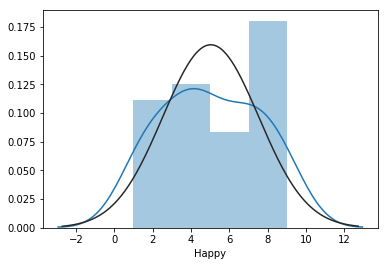

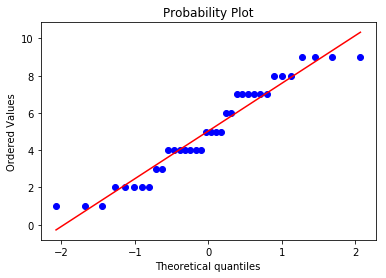

In [15]:
sns.distplot(twowayanova['Happy'],fit=norm);
fig = plt.figure()
res = stats.probplot(twowayanova['Happy'], plot=plt)

In [12]:
results = ols('Happy ~ C(Benefit)*C(Comp)', data=twowayanova).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Happy   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.225
Date:                Thu, 10 Jan 2019   Prob (F-statistic):              0.322
Time:                        20:38:33   Log-Likelihood:                -80.722
No. Observations:                  36   AIC:                             173.4
Df Residuals:                      30   BIC:                             182.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.0000      1.019      4.908      0.000       2.919       7.081
C(Benefit)[T.LC]                  0.5000      1.441      0.347      0.731      -2.443       3.443
C(Benefit)[T.MC]                  1.8333      1.441      1.272      0.213      -1.109       4.776
C(Comp)[T.L]                     -1.1667      1.441     -0.810      0.424      -4.109       1.776
C(Benefit)[T.LC]:C(Comp)[T.L]     0.8333      2.038      0.409      0.685      -3.328       4.995
C(Benefit)[T.MC]:C(Comp)[T.L]    -1.8333      2.038     -0.900      0.375      -5.995       2.328
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.830
Skew:                           0.056   Prob(JB):                        0.660
Kurtosis:                       2.265   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Benefit),6.722222,2.0,0.539697,0.588479
C(Comp),20.250000,1.0,3.251561,0.081409
C(Benefit):C(Comp),11.166667,2.0,0.896521,0.418637
Residual,186.833333,30.0,NaN,NaN


In [14]:
mc = MultiComparison(twowayanova['Happy'],twowayanova['Benefit'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  HC     LC    0.9167  -1.6591 3.4924 False 
  HC     MC    0.9167  -1.6591 3.4924 False 
  LC     MC     0.0    -2.5758 2.5758 False 
--------------------------------------------
